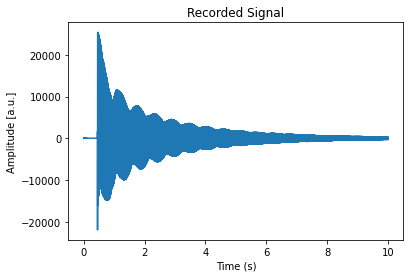

In [1]:
from tkinter import Tk
from tkinter.filedialog import askopenfilename
from scipy.io.wavfile import read
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import peakutils
from peakutils.plot import plot as pplot
from scipy.optimize import curve_fit
from numpy import pi,sqrt,arctan,tan

#%matplotlib tk
Tk().withdraw()
filename = askopenfilename() #open file dialog

# read audio samples
input_data = read(filename)
signal = input_data[1]
sampling_freq = input_data[0]
time = np.arange(len(signal))/sampling_freq

def plot_data(start_time,end_time):
	#function to plot data between start_time and end_time

	time_index1 = time.tolist().index(start_time)
	time_index2 = time.tolist().index(end_time)
	plt.figure()
	plt.plot(time[time_index1:time_index2+1],signal[time_index1:time_index2+1])
	plt.ylabel("Amplitude [a.u.]")
	plt.xlabel("Time (s)")
	plt.title("Recorded Signal")
	plt.show()

def FT_data(data,sampling_rate):
 #function to calculate and display absolute value of Fourier Transform

	freq = 0.5 * sampling_rate * np.linspace(-1.0, 1.0, len(data))
	FTdata = np.fft.fftshift(np.fft.fft(np.fft.fftshift(data)))

	freq_index1 = np.amin(np.where(freq >= 0))
	freq_index2 = np.amin(np.where(freq >= 3000))
	# plt.figure()
	# plt.plot(freq[freq_index1:freq_index2+1],abs(FTdata[freq_index1:freq_index2+1]))
	# plt.ylabel("Magnitude [a.u.]")
	# plt.xlabel("Frequency (Hz)")
	# plt.title("Absolute Value of Fourier Transform")
	# plt.show()
    
	return freq[freq_index1:freq_index2+1],abs(FTdata[freq_index1:freq_index2+1])



plot_data(0,10) #plot signal in time window defined by 2 values
freq, magn = FT_data(signal,sampling_freq) #Fourier Transform and plot absolute value
FFT_df = pd.DataFrame(np.vstack((freq, magn)).T, columns=['Frequency', 'Magnitude [a.u.]'])

In [2]:
def resonance_func(w,w0,N,v,b):
	resonance_curve = N/(sqrt(((w)**2-w0**2)**2+(v*(w))**2))+b
	return resonance_curve

def find_resn(signal, sampling_freq, plot_graph = False):
	#filename = askopenfilename() 
	FT_freq, magn = FT_data(signal,sampling_freq)

	indexes = peakutils.indexes(magn, thres=0.0001, min_dist=2000)
	peaks = np.vstack((freq[indexes],magn[indexes])).T 
	
	freq_peaks_int = peakutils.interpolate(FT_freq, magn, ind=indexes) #interpolated

	if plot_graph == True:
		plt.figure(figsize=(10,6))
		pplot(freq, magn, indexes)
		plt.title('First estimate')
		plt.show()
	#print(peaks)
	#print(freq_peaks_int)
	
	return [peaks, freq_peaks_int]
	
	'''
	resn_magn = []
	for m in magn:
			if m > 
	initial_guess=[143,5e9,1,100000] 
	po,po_cov=curve_fit(resonance_func,FT_freq,magn,initial_guess)
	plt.figure()
	plt.plot(FT_freq,magn)
	plt.plot(FT_freq,resonance_func(FT_freq,po[0],po[1],po[2],po[3]))
	print('f0 = %.3e +/- %.3e Hz' %(po[0],sqrt(po_cov[0,0])))
	print('N =  %.3e +/- %.3e' %(po[1],sqrt(po_cov[1,1])))
	print('v = %.3e +/- %.3e' %(po[2],sqrt(po_cov[2,2])))
	print('b = %.3e +/- %.3e' %(po[3],sqrt(po_cov[3,3])))
	'''

In [3]:
def tophat(start, end, end_of_graph, density):
    ini_plot_x = np.linspace(0, end_of_graph, density)
    y = [0] * len(ini_plot_x)
    for idx, x in enumerate(ini_plot_x):
        if x >= start and x <= end:
          y[idx] = 1

    return ini_plot_x, y

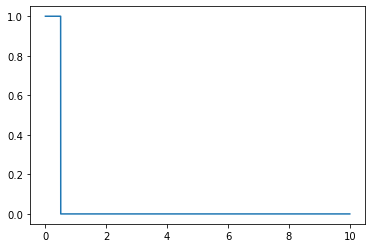

In [4]:
top_x, top_y = tophat(0,0.5,10,len(signal))
plt.plot(top_x,top_y)

(array([0.00000000e+00, 3.16592915e-02, 6.33185829e-02, ...,
        2.99993948e+03, 2.99997114e+03, 3.00000280e+03]),
 array([ 43753.        ,  47448.07377243,  56969.99869794, ...,
        108108.94470413, 106721.97105797, 105918.98602511]))

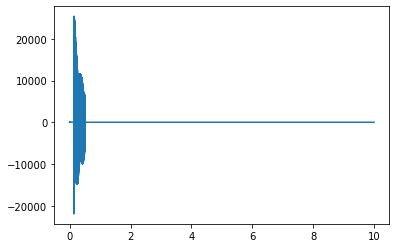

In [5]:
func_prod = top_y * signal
plt.plot(top_x,func_prod)
FT_data(func_prod,sampling_freq)

In [6]:
resn, freq_resi = find_resn(func_prod,sampling_freq)
for i in resn:
  print(i[1])

1008443.0416594709
1542686.9458890564
237784960.86246228
662058.9977411452
52266974.750634335
445464.8615082897
52904598.10614312
180163.35059017208
17241459.15885302
188766.01737363648
20522152.3883499
167357.23335455992
7582550.089198725
107656.40548325046
7918541.097423694
127190.56476584701
2841786.378164424
84040.0079980282
76468.37639929703
5813606.467488948
108261.0157896602
1918387.402403526
80945.45181129423
51549.40314913677
2274613.911183318
96976.99711859807
839181.6470659556
74699.95044159752
35988.609817696524
1167412.5481856214
79833.38397077081
469320.6113342894
64310.960291932744
30307.879253755156
455360.1233309725
64262.812780296976
126705.89548126662


In [7]:
print(freq_resi)

[  59.7203205   123.85274427  187.51396025  251.15057548  375.0050907
  500.71065817  564.37251074  627.77284202  751.87268472  877.30130226
  941.16461187 1004.80590939 1128.64843911 1254.4978773  1318.63126315
 1382.15013791 1506.15164956 1569.89617743 1633.57430362 1697.06301487
 1761.24986727 1884.64113534 1948.09884346 2011.7917005  2075.89360669
 2139.41680607 2263.62781474 2327.1739398  2393.57446084 2457.75953667
 2521.15742157 2645.59335913 2708.91724201 2777.12826335 2840.46617151
 2905.57530843 2999.61777841]


In [8]:
def find_pluck_time(signal,time):
  # function to find the plucking time and index
  
  time_limit_index = np.amin(np.where(time >= 0.1))
  avg_signal = np.average(signal[0: time_limit_index])
  std_signal = np.std(signal[0:time_limit_index])
  
  pluck_index = np.amin(np.where(signal >= (avg_signal+3.5*std_signal)))
  pluck_time = time[pluck_index]
  
  return pluck_time, pluck_index

# finding the decay function

In [9]:
filename_2 = askopenfilename()
input_data_decay = read(filename_2)

In [155]:
from xml.sax.handler import feature_string_interning



def find_decay(input_data, left_range = 150, right_range = 225, time_interval = 0.5, plot_graph = False):
  signal = input_data[1]
  sampling_freq = input_data[0]
  amp_list = []
  freq_list = []

  for i in np.arange(0, 10, time_interval):
    top_x, top_y = tophat(i, i + time_interval, 10, len(signal))
    func_prod = top_y * signal
    resn, freq_resi = find_resn(func_prod,sampling_freq, plot_graph)
    
    for x in resn:
      if x[0] < right_range and x[0] > left_range:
        amp_list.append(x[1])
        freq_list.append(x[0])


  time_list = plot_decay(amp_list, time_interval, amp_list, left_range, right_range)
  # plt.plot(amp_list)
  # plt.show()
  plt.plot(freq_list)
  plt.ylabel("Frequency [Hz]")
  plt.xlabel("Measured value")
  plt.title("Frequency range for decay plot (" + str(left_range) + "Hz to " + str(right_range) + "Hz with time interval " + str(time_interval) + "s)", pad = 20.0)
  plt.show()
  return amp_list, freq_list, np.array(time_list)

def plot_decay(amplitude, time_interval, amp_list, left_range, right_range):
  time = []
  for i in np.arange(0, 10, time_interval):
    time.append(i)
  plt.plot(time[:len(amp_list)], amplitude)
  plt.title("Decay curve of Frequency range " + str(left_range) + "Hz to " + str(right_range) + "Hz with time interval " + str(time_interval) + "s", pad = 20.0)
  plt.ylabel("Amplitude [a.u.]")
  plt.xlabel("Time (s)")
  #plt.tight_layout()
  plt.show()
  return time[:len(amp_list)]

#amp_list, freq_list = find_decay(input_data_decay)

#print(amp_list)



    


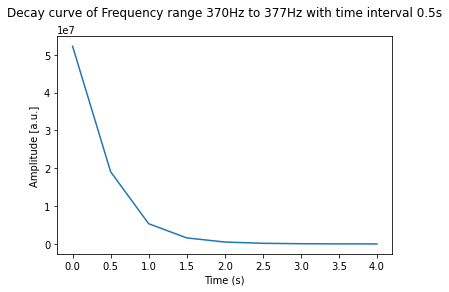

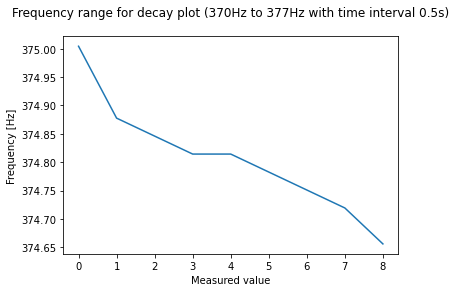

([52266974.750634335,
  19086669.834227152,
  5346132.014051487,
  1599942.7084977168,
  505501.38752077636,
  172421.52331968764,
  58916.04793506299,
  20220.226137573056,
  8006.846893460698],
 [375.00430738659406,
  374.8776702207382,
  374.84601092927664,
  374.8143516378102,
  374.8143516378102,
  374.7826923463487,
  374.75103305488227,
  374.7193737634207,
  374.6560551804928],
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ]))

In [156]:
find_decay(input_data_decay,370,377)

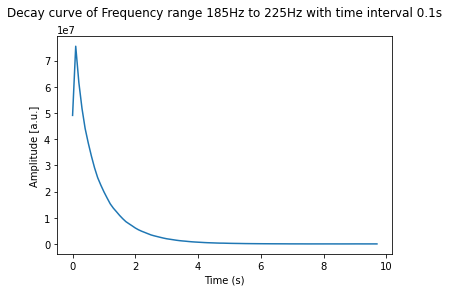

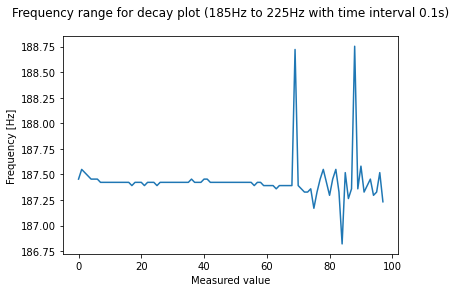

In [157]:
first_harm_amp, first_harm_freq, first_harm_time= find_decay(input_data_decay,left_range=185,time_interval = 0.1, plot_graph = False)
#print(first_harm_time)

# first harmonic


[6.95400919e+07 2.46745293e+00] [[4.12810012e+00 1.13294320e-07]
 [1.13294320e-07 3.80063288e-15]]


Text(0.5, 0, 'Time (s)')

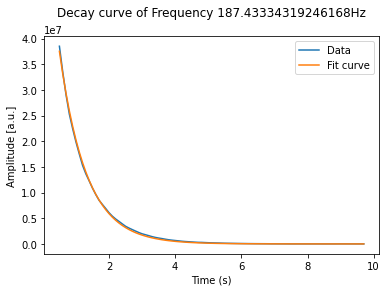

In [158]:

from scipy.optimize import curve_fit

def fit_expo(time, amplitude, gamma):
  return amplitude * (np.exp(1) ** (-((gamma/2) * time)))

cut_value = 5
ave_freq = np.average(first_harm_freq)


initial_guess = [2.5e8, 2.0]
fit, cov = curve_fit(fit_expo,first_harm_time[cut_value:],first_harm_amp[cut_value:], p0=initial_guess, absolute_sigma=True)

amplitude, gamma = fit

print(fit, cov)
# #plt.plot(wavelength,fit_func(wavelength,a,mu,sig,m,c))
plt.plot(first_harm_time[cut_value:], first_harm_amp[cut_value:])
plt.plot(first_harm_time[cut_value:], fit_expo(first_harm_time[cut_value:], amplitude, gamma))
plt.legend(["Data","Fit curve"])
plt.title("Decay curve of Frequency " + str(ave_freq) +"Hz" , pad = 20.0)
plt.ylabel("Amplitude [a.u.]")
plt.xlabel("Time (s)")




In [159]:
def find_gamma(first_harm_amp, first_harm_time, first_harm_freq, cut_value = 5, initial_guess = [2.5e8, 2.0]):
  ave_freq = np.average(first_harm_freq)
  
  fit, cov = curve_fit(fit_expo,first_harm_time[cut_value:], first_harm_amp[cut_value:], p0=initial_guess, absolute_sigma=True)
  amplitude, gamma = fit
  
  plt.plot(first_harm_time[cut_value:], first_harm_amp[cut_value:])
  plt.plot(first_harm_time[cut_value:], fit_expo(first_harm_time[cut_value:], amplitude, gamma))
  plt.legend(["Data","Fit curve"])
  plt.title("Decay curve of Frequency " + str(ave_freq) +"Hz" , pad = 20.0)
  plt.ylabel("Amplitude [a.u.]")
  plt.xlabel("Time (s)")

  print("Gamma value = " + str(fit[1]))
  print("Amplitude value = " + str(fit[0]))
  return (amplitude, gamma)

Gamma value = 2.807129979034005
Amplitude value = 81491282.12172513


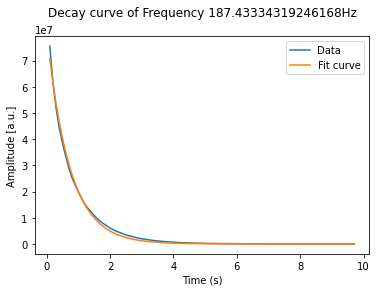

In [160]:
first_amp, first_gamma = find_gamma(first_harm_amp, first_harm_time, first_harm_freq, cut_value=1)

# second harm

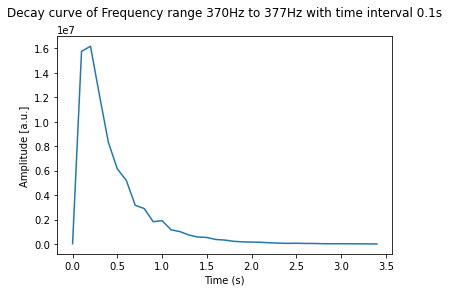

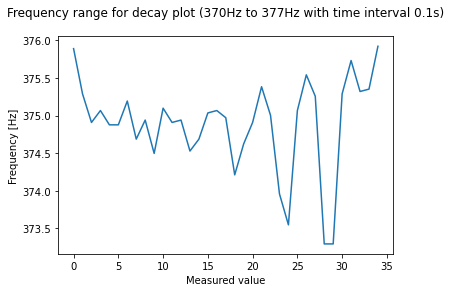

In [161]:
second_harm_amp, second_harm_freq, second_harm_time = find_decay(input_data_decay,370,377, time_interval= 0.1)

Gamma value = 5.995687994101646
Amplitude value = 29237861.423493203


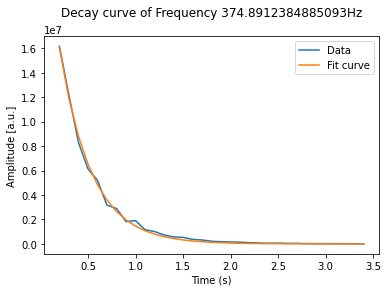

In [163]:
second_amp, second_gamma = find_gamma(second_harm_amp, second_harm_time, second_harm_freq, cut_value=2)

In [28]:
print(51170147.9082854/174300548.98752862)

0.2935742211112983


# Third Harm

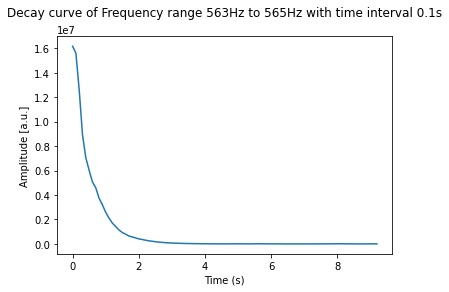

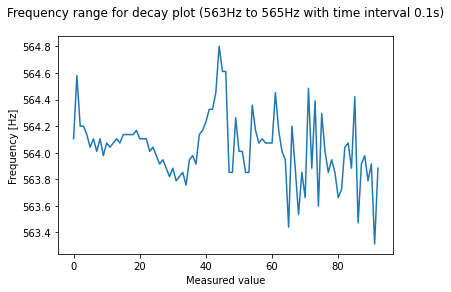

In [164]:
third_harm_amp, third_harm_freq, third_harm_time = find_decay(input_data_decay,563,565, time_interval= 0.1)

Gamma value = 4.179084295321997
Amplitude value = 18450705.786821496


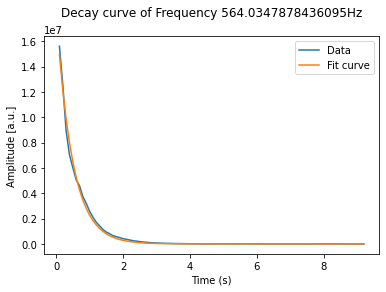

In [165]:
third_amp, third_gamma = find_gamma(third_harm_amp, third_harm_time, third_harm_freq, cut_value=1)

# fourth harm

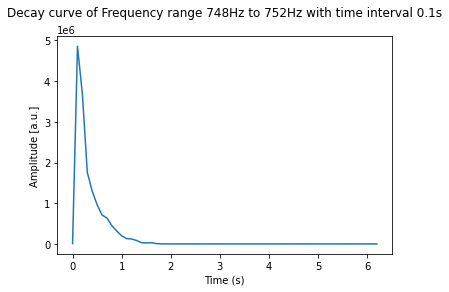

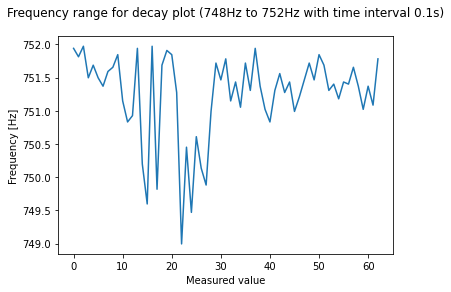

In [166]:
fourth_harm_amp, fourth_harm_freq, fourth_harm_time = find_decay(input_data_decay,748,752, time_interval= 0.1)

Gamma value = 8.075795861309903
Amplitude value = 7359296.350958179


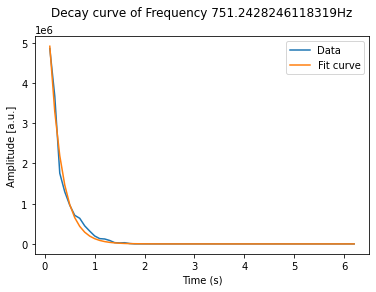

In [167]:
fourth_amp, fourth_gamma = find_gamma(fourth_harm_amp, fourth_harm_time, fourth_harm_freq, cut_value=1)

# fifth Harm

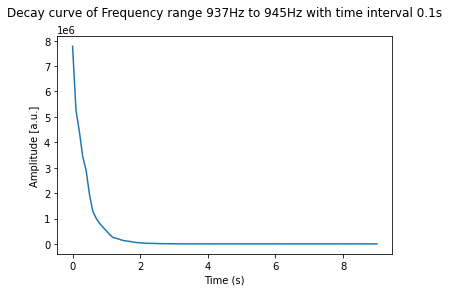

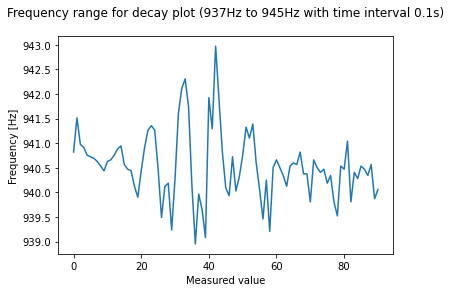

In [168]:
fifth_harm_amp, fifth_harm_freq, fifth_harm_time = find_decay(input_data_decay,937,945, time_interval= 0.1)

Gamma value = 5.4727771618951175
Amplitude value = 7562031.465042631


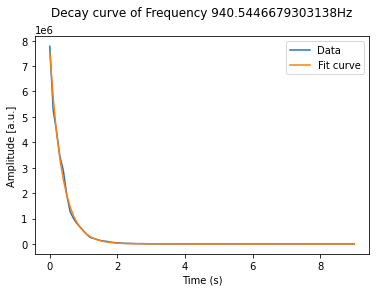

In [169]:
fifth_amp, fifth_gamma = find_gamma(fifth_harm_amp, fifth_harm_time, fifth_harm_freq, cut_value=0)

# sixth harm

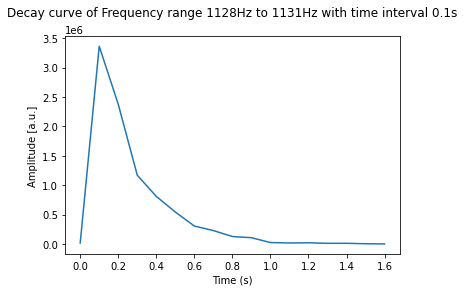

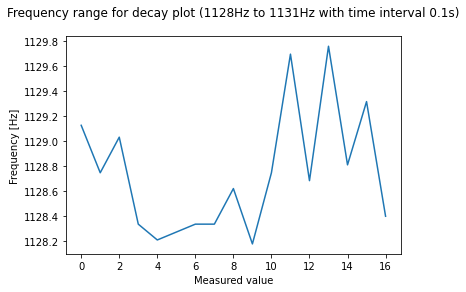

In [170]:
sixth_harm_amp, sixth_harm_freq, sixth_harm_time = find_decay(input_data_decay,1128,1131, time_interval= 0.1)

Gamma value = 9.417539864572642
Amplitude value = 5502006.134100794


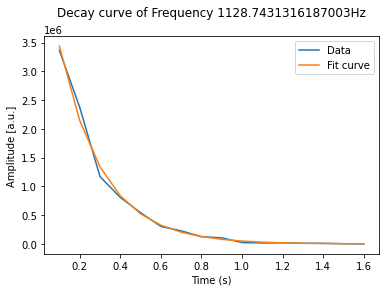

In [171]:
sixth_amp, sixth_gamma = find_gamma(sixth_harm_amp, sixth_harm_time, sixth_harm_freq, cut_value=1)

# seventh harm

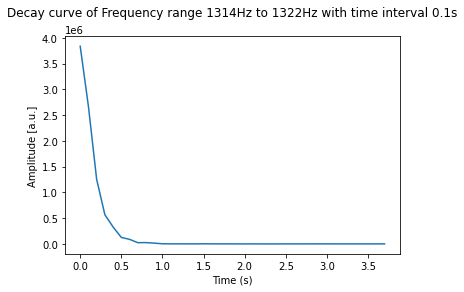

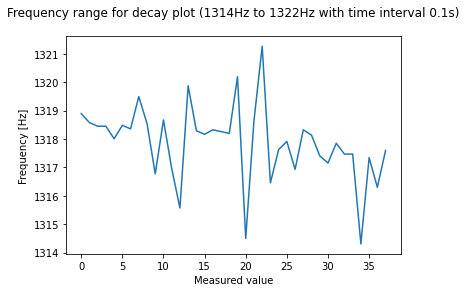

In [172]:
seventh_harm_amp, seventh_harm_freq, seventh_harm_time = find_decay(input_data_decay,1314,1322, time_interval= 0.1)

Gamma value = 11.227293775347595
Amplitude value = 3991306.596292264


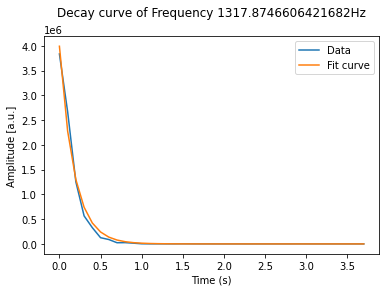

In [173]:
seventh_amp, seventh_gamma = find_gamma(seventh_harm_amp, seventh_harm_time, seventh_harm_freq, cut_value=0)

# eight harm

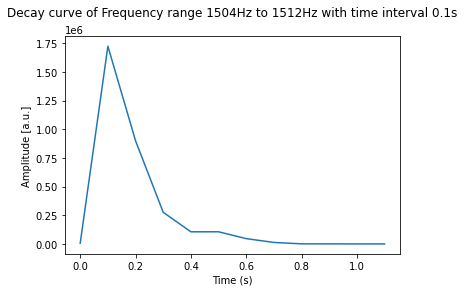

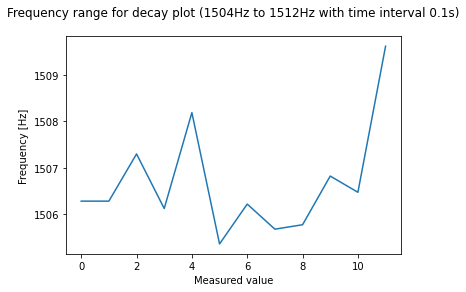

In [174]:
eight_harm_amp, eight_harm_freq, eight_harm_time = find_decay(input_data_decay,1504,1512, time_interval= 0.1)

Gamma value = 19.447553380345763
Amplitude value = 7550760.928487888


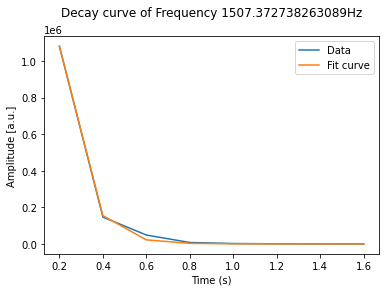

In [127]:
eight_amp, eight_gamma = find_gamma(eight_harm_amp, eight_harm_time, eight_harm_freq, cut_value=1)

# nineth harm

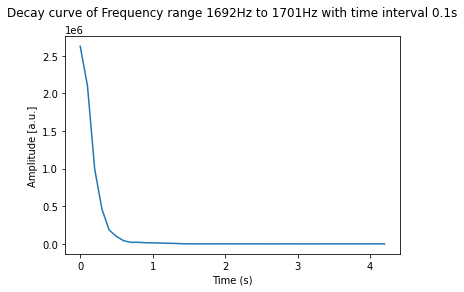

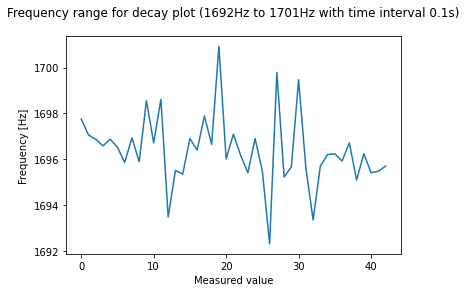

In [175]:
nine_harm_amp, nine_harm_freq, nine_harm_time = find_decay(input_data_decay,1692,1701, time_interval= 0.1)

Gamma value = 15.28771007158052
Amplitude value = 4523917.410556258


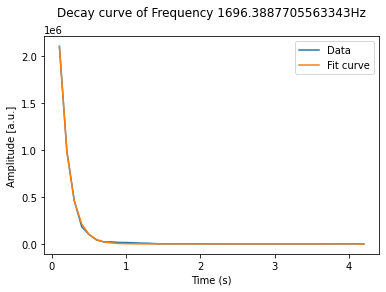

In [176]:
nine_amp, nine_gamma = find_gamma(nine_harm_amp, nine_harm_time, nine_harm_freq, cut_value=1)

# tenth harm

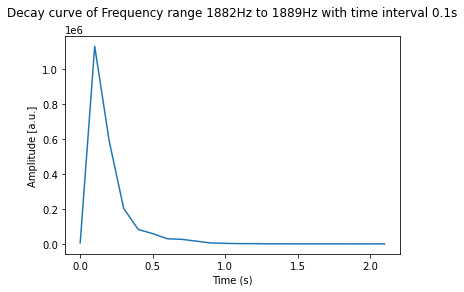

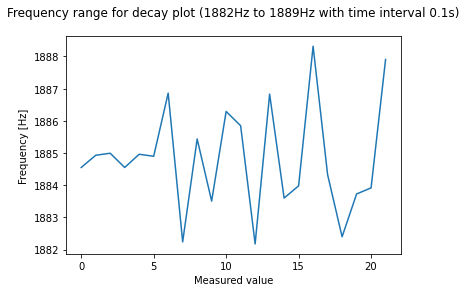

In [177]:
tenth_harm_amp, tenth_harm_freq, tenth_harm_time = find_decay(input_data_decay,1882,1889, time_interval= 0.1)

Gamma value = 15.297090483303217
Amplitude value = 2455393.8268415886


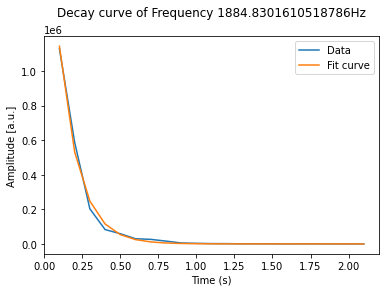

In [178]:
tenth_amp, tenth_gamma = find_gamma(tenth_harm_amp, tenth_harm_time, tenth_harm_freq, cut_value=1)

# eleven harm

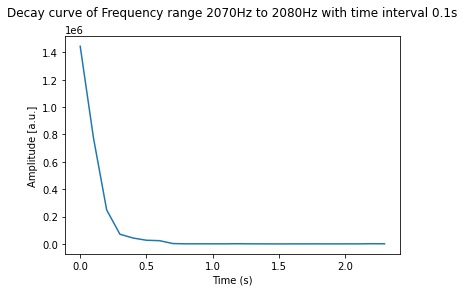

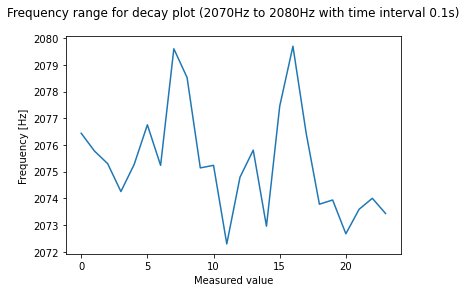

In [179]:
eleven_harm_amp, eleven_harm_freq, eleven_harm_time = find_decay(input_data_decay,2070,2080, time_interval= 0.1)

Gamma value = 22.558608274038093
Amplitude value = 2394555.4459643685


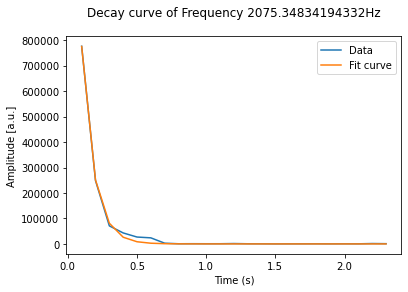

In [180]:
eleven_amp, eleven_gamma = find_gamma(eleven_harm_amp, eleven_harm_time, eleven_harm_freq, cut_value=1)

# twelve harm

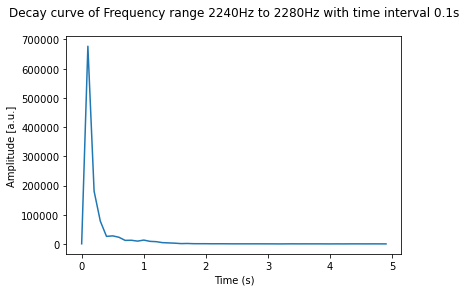

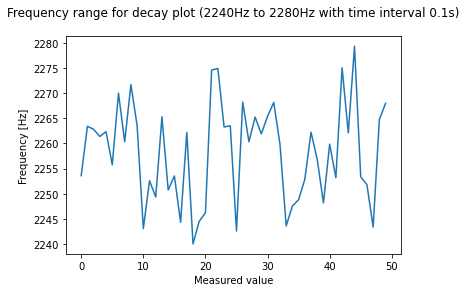

In [181]:
twelve_harm_amp, twelve_harm_freq, twelve_harm_time = find_decay(input_data_decay,2240,2280, time_interval= 0.1)

Gamma value = 24.47529757540268
Amplitude value = 2291381.6194656184


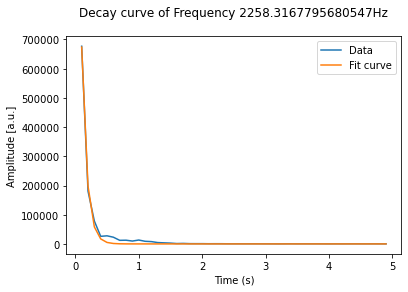

In [182]:
twelve_amp, twelve_gamma = find_gamma(twelve_harm_amp, twelve_harm_time, twelve_harm_freq, cut_value=1)

# table of data

In [183]:
def ratio_amp(array):
  ratio = [1]
  for i in range(0, len(array) - 1):
    ratio.append(array[i+1] / array[0])
  
  return ratio

In [184]:
amplitudes = np.array([first_amp, second_amp, third_amp, fourth_amp, fifth_amp, sixth_amp, seventh_amp,eight_amp,nine_amp,tenth_amp,eleven_amp,twelve_amp])
gammas = np.array([first_gamma, second_gamma, third_gamma, fourth_gamma, fifth_gamma, sixth_gamma, seventh_gamma,eight_gamma,nine_gamma,tenth_gamma,eleven_gamma,twelve_gamma])

In [185]:
import pandas as pd


#print(ratio_amp(amplitudes))

pd.DataFrame(np.vstack((amplitudes,gammas,ratio_amp(amplitudes),ratio_amp(gammas))).T, columns=["Amplitudes","Gamma","Ratio of amplitudes","Ratio of gammas"])

Amplitudes      Gamma  Ratio of amplitudes  Ratio of gammas
0   8.149128e+07   2.807130             1.000000         1.000000
1   2.923786e+07   5.995688             0.358785         2.135878
2   1.845071e+07   4.179084             0.226413         1.488739
3   7.359296e+06   8.075796             0.090308         2.876887
4   7.562031e+06   5.472777             0.092796         1.949599
5   5.502006e+06   9.417540             0.067516         3.354864
6   3.991307e+06  11.227294             0.048978         3.999563
7   7.550761e+06  19.447553             0.092657         6.927913
8   4.523917e+06  15.287710             0.055514         5.446029
9   2.455394e+06  15.297090             0.030131         5.449370
10  2.394555e+06  22.558608             0.029384         8.036182
11  2.291382e+06  24.475298             0.028118         8.718976

Text(0.5, 1.0, 'plot of amplitudes')

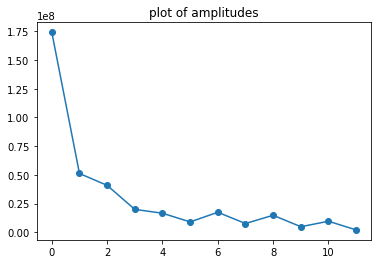

In [150]:
plt.plot(amplitudes,'o-')
plt.title("plot of amplitudes")

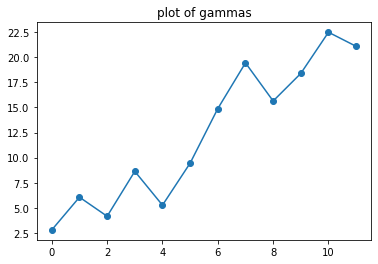

In [148]:
plt.title("plot of gammas")
plt.plot(gammas,'o-')

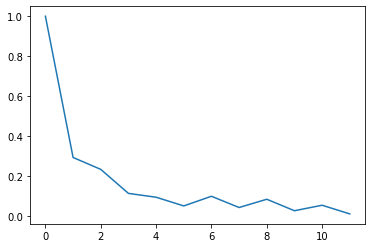

In [151]:
plt.plot(ratio_amp(amplitudes))

# theoretical gamma

In [26]:
def theoretical_gamma(freq, n = 1, L = 0.7, mass = 5):
  vel = (mass * 9.81) / 0.628e-3
  left = (((n * np.pi) / L) ** 2) * vel
  right = (2 * np.pi * freq) ** 2

  print(vel,left,right)
  return 2 * (np.sqrt(left - right))

In [27]:
print(theoretical_gamma(187))

78105.09554140129 1573196.723883508 1380520.7852067752
877.8973486159593
